In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "drive/My Drive/DB_MV.csv"
df1 = pd.read_csv(path)

In [ ]:
df1.head(3)

,Sample,22324,34759,7938,41,9048,50458,15649,31148,34915,14619,22466,30755,3080,23105,1460,37929,39389,5977,2586,35391,6126,35769,24502,3352,30899
0,Class,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,High Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade,Low Grade
1,E9PAV3,33186000,6409600,21822000,55404000,19362000,13532000,12474000,31747000,4545100,61812000,16580000,42177000,63247000,19041000,1668200,30179000,38855000,24055000,13613000,15292000,30646000,40854000,23941000,7890800,35419000
2,O00170,19059000,1870700,6457100,31532000,8949600,9782500,2633800,12036000,1936800,14601000,3532700,10497000,15675000,10927000,2298500,12907000,12949000,10417000,4849300,6755400,8932200,12151000,11008000,1533100,6197200


In [ ]:
df = df1.transpose()
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409
Sample,Class,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
22324,High Grade,33186000,19059000,55846000,24499000,48204000,172290000,81628000,28460000,35920000,100480000,81919000,175060000,62821000,145090000,44458000,138230000,93357000,62006000,70577000,64102000,27019000,80495000,125720000,34725000,96266000,92202000,157740000,23164000,397950000,93276000,27601000,126430000,20558000,6435900,95153000,37122000,74001000,59769000,23454000,...,14424500,9185700,6953900,5281900,22478312,11438910,12863000,3933989,6288600,21063000,5180900,11767000,12766000,5318500,12670000,21546189,11258000,13822000,9417100,19924044,5538000,2802000,22072000,11241000,2681300,8027000,2089400,16253972,7422200,6579800,25585000,5428600,8280100,13375000,15282244,4717300,4138700,110000,16269000,2702900
34759,High Grade,6409600,1870700,32836000,34370000,12417000,119420000,3074400,6698800,10534000,19312000,27740000,70379000,25260000,13585000,5369900,38685000,43266000,39111000,31605000,38680000,5287600,531940,36327000,16724000,6683000,18036000,1575900,2809900,169850000,31422000,9430800,10643000,5852500,1464600,21821000,5443700,32835000,46924000,2360100,...,3412800,8467838,5116600,1867100,16683617,4029056,4711362,3122550,5971800,5060500,5001625,7635114,10163800,34253000,10129520,9540400,5227040,5884229,7091350,5744700,5541267,6206267,3293400,4641488,3602200,5589114,3503616,19569,3679308,6944000,5375550,3154600,3704700,11148433,11741000,5122743,4993575,3676148,3642400,4846367


In [ ]:
new_header = df.iloc[0]
new_header

0        Class
1       E9PAV3
2       O00170
3       O00231
4       O00232
         ...  
2405    Q9UL45
2406    Q9UNF1
2407    Q9UPA5
2408    Q9Y512
2409    Q9Y657
Name: Sample, Length: 2410, dtype: object

In [ ]:
df = df[1:]
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409
22324,High Grade,33186000,19059000,55846000,24499000,48204000,172290000,81628000,28460000,35920000,100480000,81919000,175060000,62821000,145090000,44458000,138230000,93357000,62006000,70577000,64102000,27019000,80495000,125720000,34725000,96266000,92202000,157740000,23164000,397950000,93276000,27601000,126430000,20558000,6435900,95153000,37122000,74001000,59769000,23454000,...,14424500,9185700,6953900,5281900,22478312,11438910,12863000,3933989,6288600,21063000,5180900,11767000,12766000,5318500,12670000,21546189,11258000,13822000,9417100,19924044,5538000,2802000,22072000,11241000,2681300,8027000,2089400,16253972,7422200,6579800,25585000,5428600,8280100,13375000,15282244,4717300,4138700,110000,16269000,2702900
34759,High Grade,6409600,1870700,32836000,34370000,12417000,119420000,3074400,6698800,10534000,19312000,27740000,70379000,25260000,13585000,5369900,38685000,43266000,39111000,31605000,38680000,5287600,531940,36327000,16724000,6683000,18036000,1575900,2809900,169850000,31422000,9430800,10643000,5852500,1464600,21821000,5443700,32835000,46924000,2360100,...,3412800,8467838,5116600,1867100,16683617,4029056,4711362,3122550,5971800,5060500,5001625,7635114,10163800,34253000,10129520,9540400,5227040,5884229,7091350,5744700,5541267,6206267,3293400,4641488,3602200,5589114,3503616,19569,3679308,6944000,5375550,3154600,3704700,11148433,11741000,5122743,4993575,3676148,3642400,4846367
7938,High Grade,21822000,6457100,27369000,14407000,4758900,63508000,3259200,14102000,14935000,38720000,32382000,78486000,23252000,54801000,18267000,34473000,23391000,14990000,7280100,19672000,5029200,2617000,54009000,17600000,15805000,23219000,62094000,12235000,174410000,47889000,16252000,14954000,5533200,1617100,40245000,1552300,12970000,19644000,8419100,...,5457567,4935600,6018414,3378800,8107967,2537500,7562400,2212440,6608700,2160100,4368150,3182900,8241800,5360000,4031300,6722640,3587820,8578211,4544171,8615778,5384000,12520688,5246157,2347700,4200267,7779500,3894975,18255,9980700,4767367,1951400,5978300,2455000,7834600,7706538,5324433,6205933,116259129,4058971.4,2456938


In [ ]:
df.columns = new_header
df.head(3)

Sample,Class,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
22324,High Grade,33186000,19059000,55846000,24499000,48204000,172290000,81628000,28460000,35920000,100480000,81919000,175060000,62821000,145090000,44458000,138230000,93357000,62006000,70577000,64102000,27019000,80495000,125720000,34725000,96266000,92202000,157740000,23164000,397950000,93276000,27601000,126430000,20558000,6435900,95153000,37122000,74001000,59769000,23454000,...,14424500,9185700,6953900,5281900,22478312,11438910,12863000,3933989,6288600,21063000,5180900,11767000,12766000,5318500,12670000,21546189,11258000,13822000,9417100,19924044,5538000,2802000,22072000,11241000,2681300,8027000,2089400,16253972,7422200,6579800,25585000,5428600,8280100,13375000,15282244,4717300,4138700,110000,16269000,2702900
34759,High Grade,6409600,1870700,32836000,34370000,12417000,119420000,3074400,6698800,10534000,19312000,27740000,70379000,25260000,13585000,5369900,38685000,43266000,39111000,31605000,38680000,5287600,531940,36327000,16724000,6683000,18036000,1575900,2809900,169850000,31422000,9430800,10643000,5852500,1464600,21821000,5443700,32835000,46924000,2360100,...,3412800,8467838,5116600,1867100,16683617,4029056,4711362,3122550,5971800,5060500,5001625,7635114,10163800,34253000,10129520,9540400,5227040,5884229,7091350,5744700,5541267,6206267,3293400,4641488,3602200,5589114,3503616,19569,3679308,6944000,5375550,3154600,3704700,11148433,11741000,5122743,4993575,3676148,3642400,4846367
7938,High Grade,21822000,6457100,27369000,14407000,4758900,63508000,3259200,14102000,14935000,38720000,32382000,78486000,23252000,54801000,18267000,34473000,23391000,14990000,7280100,19672000,5029200,2617000,54009000,17600000,15805000,23219000,62094000,12235000,174410000,47889000,16252000,14954000,5533200,1617100,40245000,1552300,12970000,19644000,8419100,...,5457567,4935600,6018414,3378800,8107967,2537500,7562400,2212440,6608700,2160100,4368150,3182900,8241800,5360000,4031300,6722640,3587820,8578211,4544171,8615778,5384000,12520688,5246157,2347700,4200267,7779500,3894975,18255,9980700,4767367,1951400,5978300,2455000,7834600,7706538,5324433,6205933,116259129,4058971.4,2456938


In [ ]:
x = df.columns
x = x[1:2798]
x1 = x.values.tolist()
# x1

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
df1 = df.drop(['Class'], axis=1, inplace=False)
df1.head(3)

Sample,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,O60763,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
22324,33186000,19059000,55846000,24499000,48204000,172290000,81628000,28460000,35920000,100480000,81919000,175060000,62821000,145090000,44458000,138230000,93357000,62006000,70577000,64102000,27019000,80495000,125720000,34725000,96266000,92202000,157740000,23164000,397950000,93276000,27601000,126430000,20558000,6435900,95153000,37122000,74001000,59769000,23454000,46247000,...,14424500,9185700,6953900,5281900,22478312,11438910,12863000,3933989,6288600,21063000,5180900,11767000,12766000,5318500,12670000,21546189,11258000,13822000,9417100,19924044,5538000,2802000,22072000,11241000,2681300,8027000,2089400,16253972,7422200,6579800,25585000,5428600,8280100,13375000,15282244,4717300,4138700,110000,16269000,2702900
34759,6409600,1870700,32836000,34370000,12417000,119420000,3074400,6698800,10534000,19312000,27740000,70379000,25260000,13585000,5369900,38685000,43266000,39111000,31605000,38680000,5287600,531940,36327000,16724000,6683000,18036000,1575900,2809900,169850000,31422000,9430800,10643000,5852500,1464600,21821000,5443700,32835000,46924000,2360100,10609000,...,3412800,8467838,5116600,1867100,16683617,4029056,4711362,3122550,5971800,5060500,5001625,7635114,10163800,34253000,10129520,9540400,5227040,5884229,7091350,5744700,5541267,6206267,3293400,4641488,3602200,5589114,3503616,19569,3679308,6944000,5375550,3154600,3704700,11148433,11741000,5122743,4993575,3676148,3642400,4846367
7938,21822000,6457100,27369000,14407000,4758900,63508000,3259200,14102000,14935000,38720000,32382000,78486000,23252000,54801000,18267000,34473000,23391000,14990000,7280100,19672000,5029200,2617000,54009000,17600000,15805000,23219000,62094000,12235000,174410000,47889000,16252000,14954000,5533200,1617100,40245000,1552300,12970000,19644000,8419100,12104000,...,5457567,4935600,6018414,3378800,8107967,2537500,7562400,2212440,6608700,2160100,4368150,3182900,8241800,5360000,4031300,6722640,3587820,8578211,4544171,8615778,5384000,12520688,5246157,2347700,4200267,7779500,3894975,18255,9980700,4767367,1951400,5978300,2455000,7834600,7706538,5324433,6205933,116259129,4058971.4,2456938


In [ ]:
df_robust = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_robust.head(3)

Sample,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,O60763,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
0,0.423966,1.270458,1.671208,1.288838,0.386745,1.441948,10.597874,2.540299,1.717557,1.017513,1.553079,1.581909,2.687680,0.168503,2.414671,4.260173,1.650123,1.079211,2.581327,0.735662,0.853006,2.261456,4.000355,0.963726,0.327418,2.718874,1.768898,1.468705,2.937200,1.651988,2.398833,1.519072,0.885242,1.307255,2.197879,0.726509,1.870627,2.030535,0.542044,3.854506,...,2.603152,1.874988,0.142946,0.631165,3.773535,1.371784,1.063349,1.009026,1.245255,4.654425,0.416496,1.657895,1.033337,0.237335,1.830185,2.072765,0.630582,2.143663,0.646353,0.251484,0.353160,-0.329825,5.572139,2.592790,-0.355684,0.666343,-0.133905,0.771523,0.828023,0.417484,6.847367,0.745623,2.353380,1.377723,2.603452,0.406944,-0.168336,-0.332428,2.917854,0.000000
1,-0.803971,-1.083556,0.302380,2.170666,-0.614010,0.585462,-0.333148,-0.094388,-0.366166,-0.319752,-0.145535,-0.100821,-0.081693,-0.568657,-1.039867,0.591353,0.200521,0.413428,0.674011,0.029260,-0.283746,-0.364830,0.029627,-0.140752,-0.813825,-0.292821,-0.873115,-0.829609,0.564766,-0.250100,0.000000,-0.683668,-0.355624,-0.336585,-0.549873,-0.200638,0.266965,1.380511,-0.631137,-0.026572,...,-0.593608,1.543963,-0.263493,-0.569904,2.383343,-0.061318,-0.586580,0.533429,1.086714,0.280592,0.313626,0.818076,0.628722,10.334797,1.104030,0.227093,-0.146479,0.000000,0.256120,-0.633095,0.353997,0.558546,0.246926,0.006090,0.062215,-0.148826,0.112832,-0.233345,-0.442305,0.593670,0.202300,0.000000,0.208343,0.941929,1.386475,0.562613,0.084708,0.307121,-0.635072,1.072806
2,-0.097175,-0.455428,-0.022844,0.387268,-0.828163,-0.320303,-0.307432,0.801937,-0.004925,0.000000,0.000000,0.029497,-0.229743,-0.337618,0.099956,0.436116,-0.374649,-0.288007,-0.516466,-0.498916,-0.297263,-0.296349,0.815040,-0.087003,-0.697615,-0.082352,0.150741,0.234641,0.612194,0.256281,0.900536,-0.601655,-0.382567,-0.286158,0.140475,-0.314530,-0.506895,0.000000,-0.294153,0.136237,...,0.000000,-0.084847,-0.063998,-0.038202,0.325979,-0.349792,-0.009517,0.000000,1.405447,-0.512151,-0.049867,-0.086850,0.329871,0.251817,-0.639048,-0.206087,-0.357685,0.727533,-0.171266,-0.453982,0.313712,2.206345,0.800687,-0.892967,0.333615,0.583586,0.181112,-0.233426,1.696370,-0.459297,-0.923594,0.925864,-0.377540,0.293332,0.000000,0.640051,0.443567,20.497611,-0.517855,-0.123104


In [ ]:
# df_robust['Label'] = df['Label'].values
# df_robust.head(3)

In [ ]:
X_std = StandardScaler().fit_transform(df_robust)
X_std

array([[ 0.39759151,  1.4645212 ,  2.23723742, ..., -0.28893557,
         2.45576078, -0.34330211],
       [-1.20671507, -1.19096403,  0.49998033, ..., -0.25384685,
        -0.5916735 ,  0.86526709],
       [-0.28328194, -0.48239381,  0.08722133, ...,  0.85390098,
        -0.49113385, -0.48198495],
       ...,
       [-0.15632217,  0.22069187,  0.41526922, ..., -0.28726218,
         0.0301898 , -0.60627638],
       [-1.11796905, -1.24312112, -1.80764975, ..., -0.28920511,
        -1.2308724 , -1.46728256],
       [ 0.53138159, -0.52254674,  1.11643857, ..., -0.26946811,
         1.37933824,  1.20233199]])

In [ ]:
mean_vec = np.mean(X_std,axis = 0)
cov_mat = (X_std - mean_vec).T.dot((X_std-mean_vec))/ (X_std.shape[0]-1)

In [ ]:
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.04166667 0.80544836 0.60631416 ... 0.47576788 0.6711079  0.57232503]
 [0.80544836 1.04166667 0.54434854 ... 0.16517416 0.67518013 0.29013842]
 [0.60631416 0.54434854 1.04166667 ... 0.23606174 0.8207803  0.6519101 ]
 ...
 [0.47576788 0.16517416 0.23606174 ... 1.04166667 0.46464102 0.14195845]
 [0.6711079  0.67518013 0.8207803  ... 0.46464102 1.04166667 0.42230647]
 [0.57232503 0.29013842 0.6519101  ... 0.14195845 0.42230647 1.04166667]]


In [ ]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 2.36911945e-02+0.j         -5.14638372e-03+0.j
   3.14410817e-02+0.j         ... -1.43144597e-02+0.00159898j
  -1.43144597e-02-0.00159898j  1.31431056e-02+0.j        ]
 [ 2.16919239e-02+0.j          1.26867676e-02+0.j
   1.40846847e-02+0.j         ... -5.66399342e-04-0.00026668j
  -5.66399342e-04+0.00026668j  3.74968565e-04+0.j        ]
 [ 2.70407587e-02+0.j          1.68382977e-02+0.j
   5.82707306e-03+0.j         ...  3.45746443e-04-0.00062978j
   3.45746443e-04+0.00062978j -6.69889938e-04+0.j        ]
 ...
 [ 1.73993030e-02+0.j         -4.40323446e-02+0.j
  -1.34476023e-03+0.j         ...  8.18504560e-05+0.00415748j
   8.18504560e-05-0.00415748j  2.14053820e-02+0.j        ]
 [ 2.89088532e-02+0.j          3.03204255e-03+0.j
  -8.64988533e-03+0.j         ...  1.95802319e-02+0.00283252j
   1.95802319e-02-0.00283252j -2.73359155e-02+0.j        ]
 [ 1.64707707e-02+0.j          7.27793538e-03+0.j
   2.54563282e-02+0.j         ...  5.84377718e-03+0.00218779j
   5.84377718e

In [ ]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[ 1.04628426e+03+0.00000000e+00j  3.41468958e+02+0.00000000e+00j
  1.53577715e+02+0.00000000e+00j ... -3.21269815e-17+7.19997648e-17j
 -3.21269815e-17-7.19997648e-17j  1.86148691e-16+0.00000000e+00j]


In [ ]:
eig = pd.DataFrame(eig_vals)
eig

,0
0,1.046284e+03+0.000000e+00j
1,3.414690e+02+0.000000e+00j
2,1.535777e+02+0.000000e+00j
3,1.389698e+02+0.000000e+00j
4,1.311891e+02+0.000000e+00j
...,...
2404,3.223410e-17+1.631523e-16j
2405,3.223410e-17-1.631523e-16j
2406,-3.212698e-17+7.199976e-17j
2407,-3.212698e-17-7.199976e-17j


In [ ]:
eig.insert(0,"Peptides",x1,allow_duplicates=False)
eig.head()

,Peptides,0
0,E9PAV3,1046.284264+0.000000j
1,O00170,341.468958+0.000000j
2,O00231,153.577715+0.000000j
3,O00232,138.969828+0.000000j
4,O00264,131.189116+0.000000j


In [ ]:
eig.rename({0:'Eigen_values'},axis = 1, inplace=True)
eig

,Peptides,Eigen_values
0,E9PAV3,1.046284e+03+0.000000e+00j
1,O00170,3.414690e+02+0.000000e+00j
2,O00231,1.535777e+02+0.000000e+00j
3,O00232,1.389698e+02+0.000000e+00j
4,O00264,1.311891e+02+0.000000e+00j
...,...,...
2404,Q9UL45,3.223410e-17+1.631523e-16j
2405,Q9UNF1,3.223410e-17-1.631523e-16j
2406,Q9UPA5,-3.212698e-17+7.199976e-17j
2407,Q9Y512,-3.212698e-17-7.199976e-17j


In [ ]:
eig['Eigen_values'] = eig['Eigen_values'].apply(abs)
eig

,Peptides,Eigen_values
0,E9PAV3,1.046284e+03
1,O00170,3.414690e+02
2,O00231,1.535777e+02
3,O00232,1.389698e+02
4,O00264,1.311891e+02
...,...,...
2404,Q9UL45,1.663060e-16
2405,Q9UNF1,1.663060e-16
2406,Q9UPA5,7.884231e-17
2407,Q9Y512,7.884231e-17


In [ ]:
eig.sort_values('Eigen_values', ascending=False)

,Peptides,Eigen_values
0,E9PAV3,1.046284e+03
1,O00170,3.414690e+02
2,O00231,1.535777e+02
3,O00232,1.389698e+02
4,O00264,1.311891e+02
...,...,...
2402,Q9UBB4,1.428938e-16
2403,Q9UBS4,1.428938e-16
2406,Q9UPA5,7.884231e-17
2407,Q9Y512,7.884231e-17


In [ ]:
pca = PCA(n_components=2)
pca.fit_transform(df_robust)

array([[-4.35292582e+00, -8.32087986e+01],
       [-9.87338124e+01, -2.63247033e+01],
       [-2.95021874e+01,  2.93936901e+02],
       [-1.34764314e+02, -1.73162827e+01],
       [-1.41751076e+02, -9.57427669e+00],
       [-1.41361666e+02, -6.56291916e+00],
       [-1.38486819e+02,  8.48283752e+00],
       [-1.41937316e+02, -6.03470678e+00],
       [-1.44860476e+02, -9.74378774e+00],
       [ 3.02996470e+03, -6.05360429e+00],
       [-1.39704098e+02, -8.56891511e+00],
       [-1.38045166e+02, -1.46390953e+01],
       [-1.38854407e+02, -4.06979716e+00],
       [-1.18036074e+02, -1.79300401e+01],
       [-1.46253148e+02, -5.20707957e+00],
       [-1.36510820e+02, -2.07434301e+00],
       [-1.41276548e+02, -1.20124507e+01],
       [-1.40265336e+02, -1.02425150e+01],
       [-1.07177625e+02, -1.85550207e+01],
       [-1.42435696e+02, -8.37660741e+00],
       [-1.43240326e+02, -8.40760854e+00],
       [-1.40226403e+02, -9.53447716e+00],
       [-1.40712886e+02, -1.11047331e+01],
       [-1.

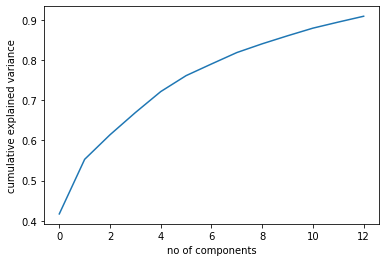

In [ ]:
pca = PCA(n_components=0.9).fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca.n_components_

13

In [ ]:
pca.explained_variance_ratio_

array([0.41695014, 0.13607729, 0.06120158, 0.05538026, 0.0522796 ,
       0.03976235, 0.02904001, 0.02847495, 0.02181155, 0.01997979,
       0.01904819, 0.01510468, 0.01455655])

In [ ]:
df_new = pd.DataFrame(pca.components_,columns=df_robust.columns)
df_new

Sample,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,O60763,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
0,0.023691,0.021692,0.027041,0.018026,0.017515,0.020908,0.021483,0.023627,0.028111,0.018995,0.025336,0.018584,0.029658,0.021722,0.024094,0.021210,0.024849,0.026583,0.026326,0.027317,0.021554,0.021529,0.023268,0.025595,0.014694,0.023608,0.018354,0.024718,0.024589,0.022870,0.024491,0.017411,0.019230,0.017904,0.026521,0.014539,0.017699,0.020143,0.024330,0.025019,...,0.028856,0.026525,0.025217,0.026163,0.012763,0.024386,0.025934,0.002718,0.022364,0.024579,0.020793,0.018610,0.023857,0.009123,0.021163,0.015238,0.021461,0.026030,0.024910,0.007809,0.019282,0.008743,0.007227,0.027327,0.019581,0.017958,0.002288,0.018763,0.022630,0.023127,0.021691,0.025174,0.027439,0.026560,0.025676,0.022454,0.022524,0.017399,0.028909,0.016471
1,0.005146,-0.012687,-0.016838,-0.025124,0.007248,-0.018499,-0.017634,0.033495,-0.001538,-0.020618,-0.016045,-0.029354,0.004472,0.000526,-0.022236,-0.030076,-0.029992,-0.002217,-0.003254,0.019017,-0.013286,-0.005993,-0.032528,0.028591,-0.028621,-0.022927,-0.030805,-0.008172,-0.019034,-0.002339,-0.023937,-0.029456,-0.016544,0.044792,-0.025483,-0.016646,-0.032741,-0.018154,-0.010336,-0.026827,...,0.010145,0.007237,0.021349,0.026127,-0.024009,0.020300,0.029431,0.010048,0.032855,-0.003384,-0.002007,-0.028776,0.001798,-0.006503,0.039577,0.002936,0.039752,0.003269,0.023401,-0.001081,0.042054,-0.014202,-0.011838,0.005904,0.012603,0.001794,0.008649,0.043301,0.029933,0.022650,-0.007631,0.024403,0.015533,0.001602,0.007997,0.000247,0.028906,0.044032,-0.003032,-0.007278
2,0.031441,0.014085,0.005827,-0.021294,-0.004654,-0.014885,0.001498,-0.010158,-0.013423,-0.020573,-0.022089,-0.021873,0.008470,-0.012518,0.013256,-0.006768,-0.010757,-0.014918,-0.012107,-0.011600,-0.029826,-0.001799,0.002550,-0.005833,0.003202,-0.005750,0.001808,0.009885,-0.001246,0.002935,0.007813,-0.000040,-0.020654,-0.007110,-0.015610,-0.011280,0.020453,0.004797,-0.020370,0.006902,...,-0.003867,-0.001039,-0.001271,-0.007389,0.004376,0.013387,-0.001625,-0.011871,-0.004738,0.009925,-0.002708,-0.023716,-0.032759,-0.024568,-0.007099,0.056751,-0.003775,-0.008868,-0.018387,0.051096,-0.008318,0.001072,-0.001456,0.012875,0.004345,0.015667,0.006221,0.002859,0.002104,0.016225,0.009305,-0.021402,0.006939,-0.001976,0.028754,-0.022388,-0.000568,-0.001345,-0.008650,0.025456
3,0.019887,0.042201,-0.021349,-0.024017,0.052030,-0.030309,0.001357,-0.009718,-0.010423,0.012530,-0.026081,0.027795,0.001495,0.002287,0.020013,-0.017484,-0.000995,-0.021806,0.007103,0.014156,-0.014362,0.035331,0.009281,-0.004229,0.016458,0.000001,-0.003925,0.028802,-0.011595,-0.022915,-0.020040,0.038453,0.042123,0.000615,0.002812,-0.011530,0.016988,-0.035996,0.023772,-0.000369,...,-0.002337,0.000868,-0.006648,0.001175,-0.011617,0.006433,0.007301,-0.010523,-0.020142,0.008385,0.031869,0.006535,-0.024650,-0.028752,0.002721,-0.000444,0.004583,0.007770,0.000847,-0.014818,-0.007579,-0.031679,-0.001286,0.018700,-0.005295,0.008498,0.012037,-0.003045,0.013567,0.012480,0.014621,-0.010258,0.007010,-0.005166,-0.009655,-0.024352,-0.008462,-0.006442,0.008237,-0.035487
4,-0.031889,-0.023776,-0.001674,-0.006258,-0.028168,-0.028451,0.051947,0.012714,0.001686,-0.008700,-0.013647,-0.015054,0.014189,-0.029999,-0.004418,0.036333,-0.006019,-0.001795,0.019679,-0.009402,-0.033758,-0.007154,0.010614,0.001165,-0.043972,0.012286,-0.003178,-0.006929,0.023294,0.023337,0.007999,-0.017863,-0.032535,0.007867,-0.005899,-0.015550,-0.007624,-0.002103,-0.027597,0.025632,...,0.0

In [ ]:
dff = df_new.apply(abs)
dff

Sample,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,O60763,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
0,0.023691,0.021692,0.027041,0.018026,0.017515,0.020908,0.021483,0.023627,0.028111,0.018995,0.025336,0.018584,0.029658,0.021722,0.024094,0.021210,0.024849,0.026583,0.026326,0.027317,0.021554,0.021529,0.023268,0.025595,0.014694,0.023608,0.018354,0.024718,0.024589,0.022870,0.024491,0.017411,0.019230,0.017904,0.026521,0.014539,0.017699,0.020143,0.024330,0.025019,...,0.028856,0.026525,0.025217,0.026163,0.012763,0.024386,0.025934,0.002718,0.022364,0.024579,0.020793,0.018610,0.023857,0.009123,0.021163,0.015238,0.021461,0.026030,0.024910,0.007809,0.019282,0.008743,0.007227,0.027327,0.019581,0.017958,0.002288,0.018763,0.022630,0.023127,0.021691,0.025174,0.027439,0.026560,0.025676,0.022454,0.022524,0.017399,0.028909,0.016471
1,0.005146,0.012687,0.016838,0.025124,0.007248,0.018499,0.017634,0.033495,0.001538,0.020618,0.016045,0.029354,0.004472,0.000526,0.022236,0.030076,0.029992,0.002217,0.003254,0.019017,0.013286,0.005993,0.032528,0.028591,0.028621,0.022927,0.030805,0.008172,0.019034,0.002339,0.023937,0.029456,0.016544,0.044792,0.025483,0.016646,0.032741,0.018154,0.010336,0.026827,...,0.010145,0.007237,0.021349,0.026127,0.024009,0.020300,0.029431,0.010048,0.032855,0.003384,0.002007,0.028776,0.001798,0.006503,0.039577,0.002936,0.039752,0.003269,0.023401,0.001081,0.042054,0.014202,0.011838,0.005904,0.012603,0.001794,0.008649,0.043301,0.029933,0.022650,0.007631,0.024403,0.015533,0.001602,0.007997,0.000247,0.028906,0.044032,0.003032,0.007278
2,0.031441,0.014085,0.005827,0.021294,0.004654,0.014885,0.001498,0.010158,0.013423,0.020573,0.022089,0.021873,0.008470,0.012518,0.013256,0.006768,0.010757,0.014918,0.012107,0.011600,0.029826,0.001799,0.002550,0.005833,0.003202,0.005750,0.001808,0.009885,0.001246,0.002935,0.007813,0.000040,0.020654,0.007110,0.015610,0.011280,0.020453,0.004797,0.020370,0.006902,...,0.003867,0.001039,0.001271,0.007389,0.004376,0.013387,0.001625,0.011871,0.004738,0.009925,0.002708,0.023716,0.032759,0.024568,0.007099,0.056751,0.003775,0.008868,0.018387,0.051096,0.008318,0.001072,0.001456,0.012875,0.004345,0.015667,0.006221,0.002859,0.002104,0.016225,0.009305,0.021402,0.006939,0.001976,0.028754,0.022388,0.000568,0.001345,0.008650,0.025456
3,0.019887,0.042201,0.021349,0.024017,0.052030,0.030309,0.001357,0.009718,0.010423,0.012530,0.026081,0.027795,0.001495,0.002287,0.020013,0.017484,0.000995,0.021806,0.007103,0.014156,0.014362,0.035331,0.009281,0.004229,0.016458,0.000001,0.003925,0.028802,0.011595,0.022915,0.020040,0.038453,0.042123,0.000615,0.002812,0.011530,0.016988,0.035996,0.023772,0.000369,...,0.002337,0.000868,0.006648,0.001175,0.011617,0.006433,0.007301,0.010523,0.020142,0.008385,0.031869,0.006535,0.024650,0.028752,0.002721,0.000444,0.004583,0.007770,0.000847,0.014818,0.007579,0.031679,0.001286,0.018700,0.005295,0.008498,0.012037,0.003045,0.013567,0.012480,0.014621,0.010258,0.007010,0.005166,0.009655,0.024352,0.008462,0.006442,0.008237,0.035487
4,0.031889,0.023776,0.001674,0.006258,0.028168,0.028451,0.051947,0.012714,0.001686,0.008700,0.013647,0.015054,0.014189,0.029999,0.004418,0.036333,0.006019,0.001795,0.019679,0.009402,0.033758,0.007154,0.010614,0.001165,0.043972,0.012286,0.003178,0.006929,0.023294,0.023337,0.007999,0.017863,0.032535,0.007867,0.005899,0.015550,0.007624,0.002103,0.027597,0.025632,...,0.019430,0.004289,0.011540,0.011056,0.028172,0.002122,0.005117,0.008748,0.007414,0.028432,0.029210,0.004026,0.003655,0.008839,0.006070,0.006722,0.000698,0.0198

In [ ]:
a = dff.sum(axis=0)
b = a.sort_values(ascending=False)
b

Sample
P00915    0.370568
P11277    0.369063
P68871    0.360195
P35523    0.356413
P02042    0.355986
            ...   
Q13509    0.087198
Q9UN36    0.087055
P09972    0.086976
P37840    0.086511
Q9Y5L4    0.077857
Length: 2409, dtype: float64

In [ ]:
b.head(10)

Sample
P00915    0.370568
P11277    0.369063
P68871    0.360195
P35523    0.356413
P02042    0.355986
P21810    0.355654
P00918    0.352161
P02549    0.351050
P07738    0.347755
P04040    0.347537
dtype: float64

In [ ]:
c = pd.DataFrame(b)
c.rename({0:'Sum'},axis = 1, inplace=True)
d = c.iloc[:300]
d

,Sum
Sample,
P00915,0.370568
P11277,0.369063
P68871,0.360195
P35523,0.356413
P02042,0.355986
...,...
Q9BTT0,0.268464
O15127,0.268406
Q13542,0.268306


In [ ]:
d.to_csv("drive/My Drive/DB_features.csv")

In [ ]:
m=df['Class']
m1=m.values.tolist()
m1

['High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'High Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade',
 'Low Grade']

In [ ]:
df_robust.insert(0,"Class",m1,allow_duplicates=False)
df_robust.head(3)

Sample,Class,E9PAV3,O00170,O00231,O00232,O00264,O00299,O00410,O00429,O00571,O00764,O14579,O14773,O14818,O14974,O14979,O14980,O15143,O15144,O15145,O15511,O43237,O43301,O43390,O43396,O43399,O43488,O43491,O43681,O43707,O43765,O43809,O43852,O60271,O60313,O60506,O60547,O60664,O60701,O60716,...,Q68EM7,Q6UXV4,Q7L5N7,Q7Z4G1,Q7Z739,Q8IVM0,Q8IWB7,Q8N1N4,Q8N2F6,Q8N357,Q8WUW1,Q8WWP7,Q8WXF7,Q92542,Q92614,Q969G5,Q96B49,Q96B54,Q96B97,Q96QT4,Q96SB3,Q96T23,Q96T76,Q99447,Q9BTE1,Q9BUR5,Q9BYM8,Q9C0H9,Q9GZP4,Q9H910,Q9HBR0,Q9NUQ6,Q9NVH1,Q9UBB4,Q9UBS4,Q9UL45,Q9UNF1,Q9UPA5,Q9Y512,Q9Y657
0,High Grade,0.423966,1.270458,1.671208,1.288838,0.386745,1.441948,10.597874,2.540299,1.717557,1.017513,1.553079,1.581909,2.687680,0.168503,2.414671,4.260173,1.650123,1.079211,2.581327,0.735662,0.853006,2.261456,4.000355,0.963726,0.327418,2.718874,1.768898,1.468705,2.937200,1.651988,2.398833,1.519072,0.885242,1.307255,2.197879,0.726509,1.870627,2.030535,0.542044,...,2.603152,1.874988,0.142946,0.631165,3.773535,1.371784,1.063349,1.009026,1.245255,4.654425,0.416496,1.657895,1.033337,0.237335,1.830185,2.072765,0.630582,2.143663,0.646353,0.251484,0.353160,-0.329825,5.572139,2.592790,-0.355684,0.666343,-0.133905,0.771523,0.828023,0.417484,6.847367,0.745623,2.353380,1.377723,2.603452,0.406944,-0.168336,-0.332428,2.917854,0.000000
1,High Grade,-0.803971,-1.083556,0.302380,2.170666,-0.614010,0.585462,-0.333148,-0.094388,-0.366166,-0.319752,-0.145535,-0.100821,-0.081693,-0.568657,-1.039867,0.591353,0.200521,0.413428,0.674011,0.029260,-0.283746,-0.364830,0.029627,-0.140752,-0.813825,-0.292821,-0.873115,-0.829609,0.564766,-0.250100,0.000000,-0.683668,-0.355624,-0.336585,-0.549873,-0.200638,0.266965,1.380511,-0.631137,...,-0.593608,1.543963,-0.263493,-0.569904,2.383343,-0.061318,-0.586580,0.533429,1.086714,0.280592,0.313626,0.818076,0.628722,10.334797,1.104030,0.227093,-0.146479,0.000000,0.256120,-0.633095,0.353997,0.558546,0.246926,0.006090,0.062215,-0.148826,0.112832,-0.233345,-0.442305,0.593670,0.202300,0.000000,0.208343,0.941929,1.386475,0.562613,0.084708,0.307121,-0.635072,1.072806
2,High Grade,-0.097175,-0.455428,-0.022844,0.387268,-0.828163,-0.320303,-0.307432,0.801937,-0.004925,0.000000,0.000000,0.029497,-0.229743,-0.337618,0.099956,0.436116,-0.374649,-0.288007,-0.516466,-0.498916,-0.297263,-0.296349,0.815040,-0.087003,-0.697615,-0.082352,0.150741,0.234641,0.612194,0.256281,0.900536,-0.601655,-0.382567,-0.286158,0.140475,-0.314530,-0.506895,0.000000,-0.294153,...,0.000000,-0.084847,-0.063998,-0.038202,0.325979,-0.349792,-0.009517,0.000000,1.405447,-0.512151,-0.049867,-0.086850,0.329871,0.251817,-0.639048,-0.206087,-0.357685,0.727533,-0.171266,-0.453982,0.313712,2.206345,0.800687,-0.892967,0.333615,0.583586,0.181112,-0.233426,1.696370,-0.459297,-0.923594,0.925864,-0.377540,0.293332,0.000000,0.640051,0.443567,20.497611,-0.517855,-0.123104


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df2 = df_robust
X = df2.loc[:,df2.columns!='Class']

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df2['Class'])
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df2.loc[:,df2.columns!='Class']

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df2['Class'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
path = "drive/My Drive/SM_features.csv"
sm = pd.read_csv(path)

In [ ]:
path = "drive/My Drive/DB_features.csv"
db = pd.read_csv(path)

In [ ]:
xyz = list(set(sm.Sample) & (set(db.Sample)))
xyz

['P54652',
 'P26447',
 'Q96CN7',
 'Q9Y625',
 'P02652',
 'P02675',
 'Q13510',
 'P00747',
 'P39060',
 'Q14126',
 'Q9BWS9',
 'P05090',
 'P19827',
 'P19652',
 'P61626',
 'P02730',
 'P25311',
 'O15438',
 'P08697',
 'O95816',
 'O00592',
 'P02766',
 'P01861',
 'Q9UM54',
 'P35556',
 'P22105',
 'P25685',
 'Q15714',
 'P02753',
 'P02679',
 'P02750',
 'P08311',
 'A0A0B4J1X5',
 'O75884',
 'P00966',
 'P02671',
 'P17677',
 'Q96T23',
 'P12429',
 'P14923']

In [ ]:
len(xyz)

40